# The World of TED

![](https://09c449efca3bbeb52dcea716-ddjaey2ypcfdo.netdna-ssl.com/wp-content/uploads/2017/03/TED.gif)

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

Since the time I begin watching TED Talks in high school, they have never ceased to amaze me. I have learned an incredible amount, about fields I was completely alien to, in the form of poignant stories, breathtaking visuals and subtle humor. So in this notebook, I wanted to attempt at finding insights about the world of TED, its speakers and its viewers and try to answer a few questions that I had always had in the back of my mind.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

In [2]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

The data has been obtained by running a custom web scraper on the official TED.com website. The data is shared under the Creative Commons License (just like the TED Talks) and hosted on Kaggle. You can download it here: https://www.kaggle.com/rounakbanik/ted-talks

## The Main TED Dataset

The main dataset contains metadata about every TED Talk hosted on the TED.com website until September 21, 2017. Let me give you a brief walkthrough of the kind of data available so as to give you an idea of what are the possibilities with this dataset.

In [3]:
df = pd.read_csv('../input/ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

## Features Available

* **name:** The official name of the TED Talk. Includes the title and the speaker.
* **title:** The title of the talk
* **description:** A blurb of what the talk is about.
* **main_speaker:** The first named speaker of the talk.
* **speaker_occupation:** The occupation of the main speaker.
* **num_speaker:** The number of speakers in the talk.
* **duration:** The duration of the talk in seconds.
* **event:** The TED/TEDx event where the talk took place.
* **film_date:** The Unix timestamp of the filming.
* **published_date:** The Unix timestamp for the publication of the talk on TED.com
* **comments:** The number of first level comments made on the talk.
* **tags:** The themes associated with the talk.
* **languages:** The number of languages in which the talk is available.
* **ratings:** A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* **related_talks:** A list of dictionaries of recommended talks to watch next.
* **url:** The URL of the talk.
* **views:** The number of views on the talk.

I'm just going to reorder the columns in the order I've listed the features for my convenience (and OCD).

In [4]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

Before we go any further, let us convert the Unix timestamps into a human readable format. 

In [5]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [6]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


We also have another dataset which contains the transcript of every talk but we will get to that later. For now, let us begin with the analysis of TED Talks!

In [7]:
len(df)

2550

We have over 2550 talks at our disposal. These represent all the talks that have ever been posted on the TED Platform until September 21, 2017 and has talks filmed in the period between 1994 and 2017. It has been over two glorious decades of TED.

## Most Viewed Talks of All Time

For starters, let us perform some easy analysis. I want to know what the 15 most viewed TED talks of all time are. The number of views gives us a good idea of the popularity of the TED Talk.

![](https://pi.tedcdn.com/r/pf.tedcdn.com/images/playlists/20_most_popular_2683333149_1200x627.jpg?c=1050%2C550&w=1050)

In [8]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


### Observations

* Ken Robinson's talk on **Do Schools Kill Creativity?** is the most popular TED Talk of all time with 47.2 million views.
* Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date). 
* Robinson's talk is closely followed by Amy Cuddy's talk on **Your Body Language May Shape Who You Are**. 
* There are only 2 talks that have surpassed the 40 million mark and 4 talks that have crossed the 30 million mark. 

Let us make a bar chart to visualise these 15 talks in terms of the number of views they garnered.

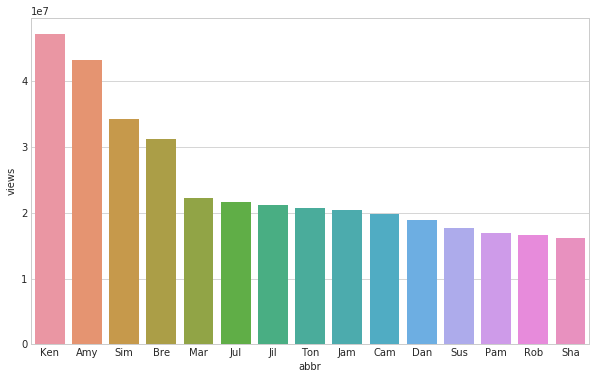

In [9]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

Finally, in this section, let us investigate the summary statistics and the distibution of the views garnered on various TED Talks.

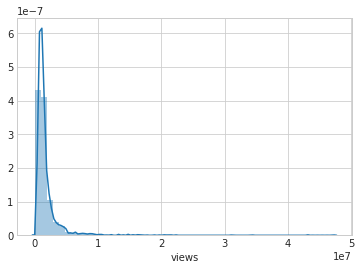

In [10]:
sns.distplot(df['views'])

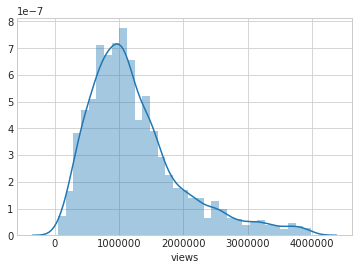

In [11]:
sns.distplot(df[df['views'] < 0.4e7]['views'])

In [12]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

The average number of views on TED Talks in **1.6 million.** and the median number of views is **1.12 million**. This suggests a very high average level of popularity of TED Talks. We also notice that the majority of talks have views less than **4 million**. We will consider this as the cutoff point when costructing box plots in the later sections.

## Comments

Although the TED website gives us access to all the comments posted publicly, this dataset only gives us the number of comments. We will therefore have to restrict our analysis to this feature only. You could try performing textual analysis by scraping the website for comments.

In [13]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

### Observations

* On average, there are **191.5 comments** on every TED Talk. Assuming the comments are constructive criticism, we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.
* There is a **huge standard deviation** associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers. We shall plot this to check the nature of the distribution.
* The minimum number of comments on a talk is **2** and the maximum is **6404**. The **range is 6402.**. The minimum number, though, may be as a result of the talk being posted extremely recently.

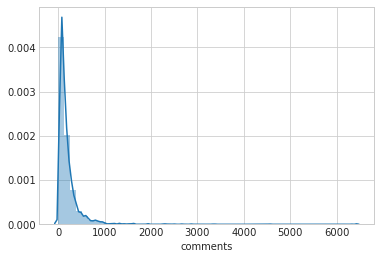

In [14]:
sns.distplot(df['comments'])

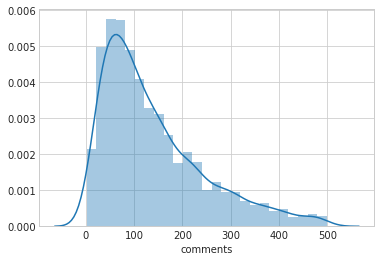

In [15]:
sns.distplot(df[df['comments'] < 500]['comments'])

From the plot above, we can see that the bulk of the talks have **fewer than 500 comments**. This clearly suggests that the mean obtained above has been heavily influenced by outliers. This is possible because the number of samples is **only 2550 talks**.

Another question that I am interested in is if the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let us find out.

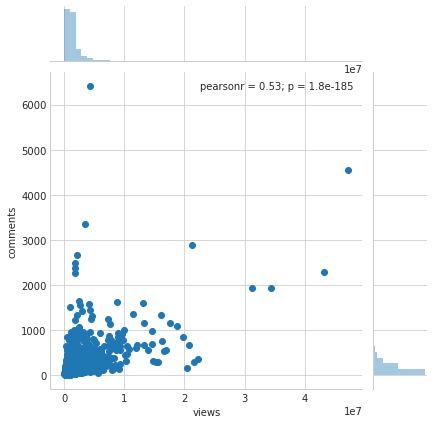

In [16]:
sns.jointplot(x='views', y='comments', data=df)

In [17]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


As the scatterplot and the correlation matrix show, the pearson coefficient is **slightly more than 0.5**. This suggests a **medium to strong correlation** between the two quantities. This result was pretty expected as mentioned above. Let us now check the number of views and comments on the 10 most commented TED Talks of all time.

In [18]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


As can be seen above, Richard Dawkins' talk on **Militant Atheism'** generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. This raises some interesting questions.

Which talks tend to attract the largest amount of discussion?

To answer this question, we will define a new feature **discussion quotient** which is simply the ratio of the number of comments to the number of views. We will then check which talks have the largest discussion quotient.

In [19]:
df['dis_quo'] = df['comments']/df['views']

In [20]:
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


This analysis has actually raised extremely interesting insights. Half of the talks in the top 10 are on the lines of **Faith and Religion**. I suspect science and religion is still a very hotly debated topic even in the 21st century. We shall come back to this hypothesis in a later section.

The most discusses talk, though, is **The Case for Same Sex Marriage** (which has religious undertones). This is not that surprising considering the amount of debate the topic caused back in 2009 (the time the talk was filmed).

## Analysing TED Talks by the month and the year

TED (especially TEDx) Talks tend to occur all throughout the year. Is there a hot month as far as TED is concerned? In other words, how are the talks distributed throughout the months since its inception? Let us find out.

![](https://media.giphy.com/media/d1GpZTVp2eV7gQk8/giphy.gif)

In [21]:
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

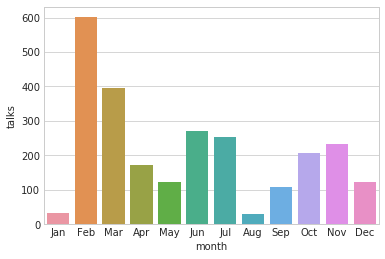

In [22]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

**February** is clearly the most popular month for TED Conferences whereas **August** and **January** are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February. Let us check the distribution for TEDx talks only.

In [23]:
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

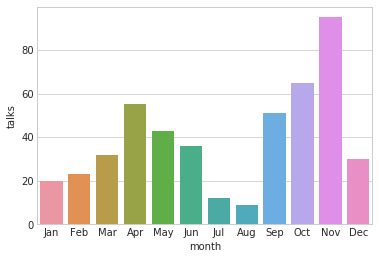

In [24]:
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

As far as TEDx talks are concerned, **November** is the most popular month. However, we cannot take this result at face value as very few of the TEDx talks are actually uploaded to the TED website and therefore, it is entirely possible that the sample in our dataset is not at all representative of all TEDx talks. A slightly more accurate statement would be that **the most popular TEDx talks take place the most in October and November.**

The next question I'm interested in is the most popular days for conducting TED and TEDx conferences. The tools applied are very sensible to the procedure applied for months.

In [25]:
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [26]:
df['day'] = df['film_date'].apply(getday)

In [27]:
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

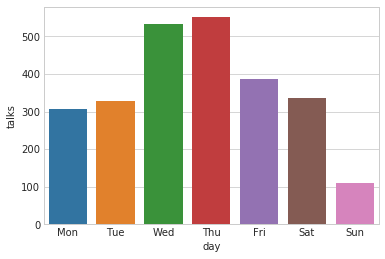

In [28]:
sns.barplot(x='day', y='talks', data=day_df, order=day_order)

The distribution of days is almost a bell curve with **Wednesday and Thursday** being the most popular days and **Sunday** being the least popular. This is pretty interesting because I was of the opinion that most TED Conferences would happen sometime in the weekend.

Let us now visualize the number of TED talks through the years and check if our hunch that they have grown significantly is indeed true.

In [29]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

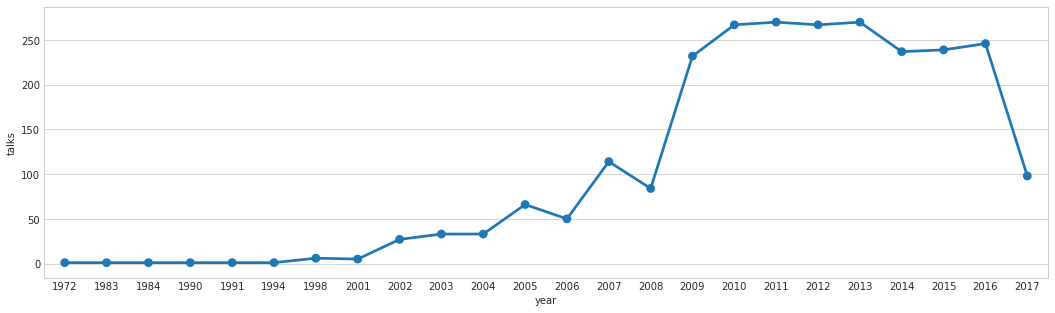

In [30]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

### Obervations

* As expected, the number of TED Talks have gradually increased over the years since its inception in 1984. 
* There was a **sharp increase** in the number if talks in **2009**. It might be interesting to know the reasons behind 2009 being the tipping point where the number of talks increased more than twofold.
* The number of talks have been pretty much constant since 2009. 

Finally, to put it all together, let us construct a heat map that shows us the number of talks by month and year. This will give us a good summary of the distribution of talks.

In [31]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [32]:
hmap_df = df.copy()
hmap_df['film_date'] = hmap_df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))
hmap_df = pd.pivot_table(hmap_df[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()
hmap_df['month_num'] = hmap_df['film_date'].apply(lambda x: months[x.split()[0]])
hmap_df['year'] = hmap_df['film_date'].apply(lambda x: x.split()[1])
hmap_df = hmap_df.sort_values(['year', 'month_num'])
hmap_df = hmap_df[['month_num', 'year', 'title']]
hmap_df = hmap_df.pivot('month_num', 'year', 'title')
hmap_df = hmap_df.fillna(0)

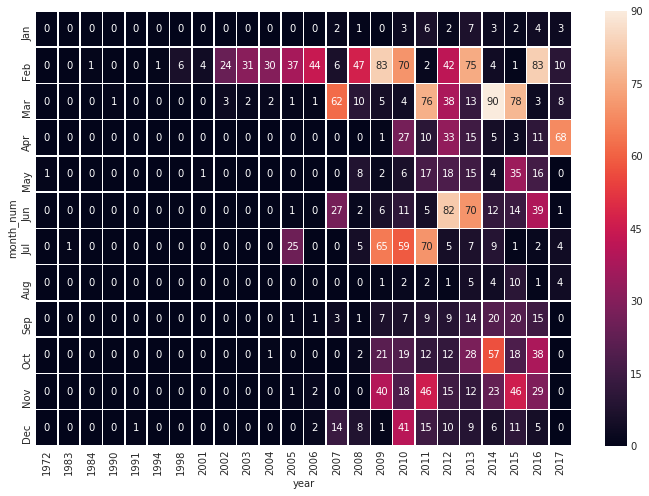

In [33]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_df, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)


## TED Speakers

In this section, we will try and gain insight about all the amazing speakers who have managed to inspire millions of people through their talks on the TED Platform. The first question we shall ask in this section is who are the most popular TED Speakers. That is, which speakers have given the most number of TED Talks.

![](https://tedconfblog.files.wordpress.com/2011/05/tedsalonmay2011-speakers.jpg)

In [34]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


**Hans Rosling**, the Swiss Health Professor is clearly the most popular TED Speaker, with more than **9 appearances** on the TED Forum. **Juan Enriquez** comes a close second with **7 appearances**. Rives and Marco Tempest have graced the TED platform **6 times**.

Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

In [35]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

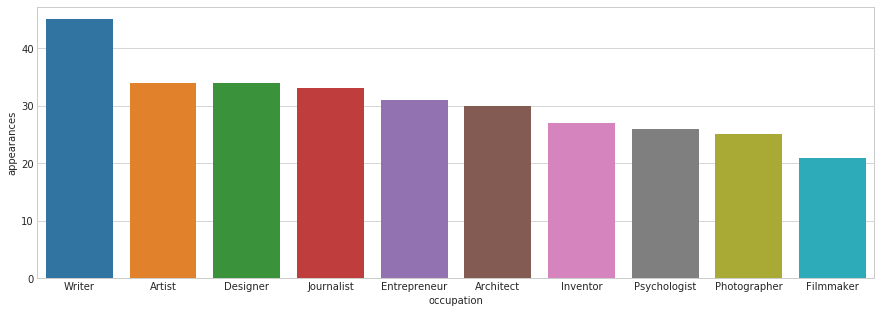

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

### Observations

* **Writers** are the most popular with more than 45 speakers identifying themselves as the aforementioned.
* **Artists** and **Designers** come a distant second with around 35 speakers in each category.
* This result must be taken with a pinch of salt as a considerable number of speakers identify themselves with multiple professions (for example, writer/entrepreneur). Performing an analysis taking this into consideraion is left as an exercise to the reader.

Do some professions tend to attract a larger number of viewers? Do answer this question let us visualise the relationship between the top 10 most popular professions and the views thet garnered in the form of a box plot.

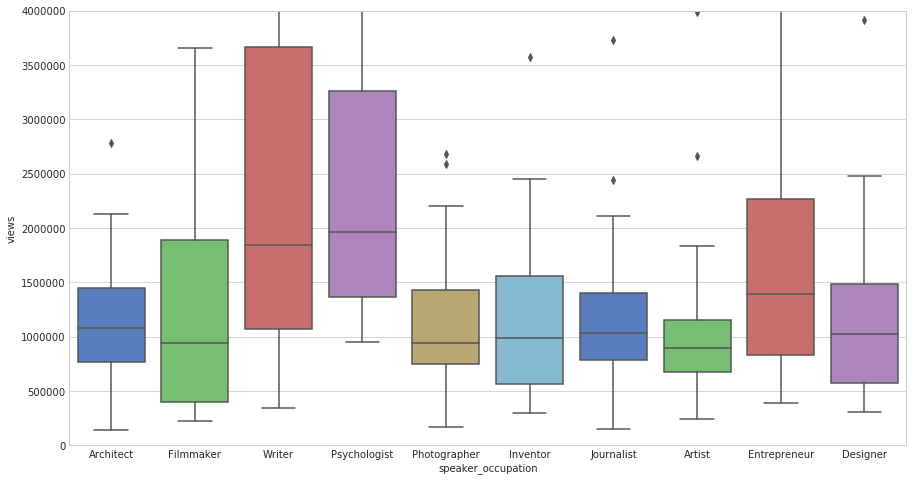

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

On average, out of the top 10 most popular professions, **Psychologists** tend to garner the most views. **Writers** have the greatest range of views between the first and the third quartile.. 

Finally, let us check the number of talks which have had more than one speaker.

In [38]:
df['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

Almost every talk has just one speaker. There are close to 50 talks where two people shared the stage. The maximum number of speakers to share a single stage was 5. I suspect this was a dance performance. Let's have a look.

In [39]:
df[df['num_speaker'] == 5][['title', 'description', 'main_speaker', 'event']]

,title,description,main_speaker,event
2507,A dance to honor Mother Earth,Movement artists Jon Boogz and Lil Buck debut ...,Jon Boogz and Lil Buck,TED2017


My hunch was correct. It is a talk titled **A dance to honor Mother Earth** by Jon Boogz and Lil Buck at the TED 2017 Conference.

## TED Events

Which TED Events tend to hold the most number of TED.com upload worthy events? We will try to answer that question in this section.

In [40]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


As expected, the official TED events held the major share of TED Talks published on the TED.com platform. **TED2014 had the most number of talks** followed by TED2009. There isn't too much insight to be gained from this. 

## TED Languages

One remarkable aspect of TED Talks is the sheer number of languages in which it is accessible. Let us perform some very basic data visualisation and descriptive statistics about languages at TED.

In [41]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

On average, a TED Talk is available in 27 different languages. The maximum number of languages a TED Talk is available in is a staggering 72. Let us check which talk this is.

In [42]:
df[df['languages'] == 72]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,month,day,year
973,Matt Cutts: Try something new for 30 days,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,Technologist,1,207,TED2011,03-03-2011,01-07-2011,...,"['culture', 'success']",72,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,Mar,Thu,2011


The most translated TED Talk of all time is Matt Cutts' **Try Something New in 30 Days**. The talk does have a very universal theme of exploration. The sheer number of languages it's available in demands a little more inspection though as it has just over 8 million views, far fewer than the most popular TED Talks. 

Finally, let us check if there is a correlation between the number of views and the number of languages a talk is availbale in. We would think that this should be the case since the talk is more accessible to a larger number of people but as Matt Cutts' talk shows, it may not really be the case.

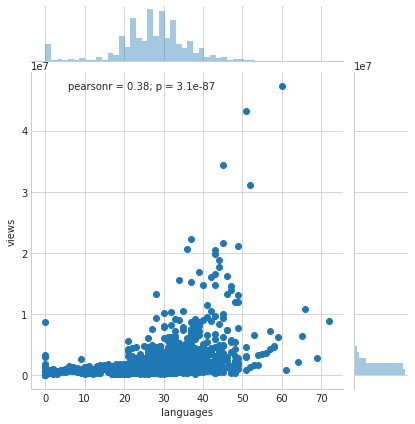

In [43]:
sns.jointplot(x='languages', y='views', data=df)
plt.show()

The Pearson coefficient is 0.38 suggesting a **medium correlation** between the aforementioned quantities. 

## TED Themes

In this section, we will try to find out the most popular themes in the TED conferences. Although TED started out as a conference about technology, entertainment and design, it has since diversified into virtually every field of study and walk of life. It will be interesting to see if this conference with Silicon Valley origins has a bias towards certain topics.

To answer this question, we need to wrangle our data in a way that it is suitable for analysis. More specifically, we need to split the related_tags list into separate rows.

![](https://media.giphy.com/media/rPMTIZOBVnlD2/giphy.gif)

In [44]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [45]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [46]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,languages,ratings,related_talks,url,views,dis_quo,month,day,year,theme
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,children
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,creativity
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,culture
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,dance
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,education


In [47]:
len(theme_df['theme'].value_counts())

416

TED defines a staggering **416 different categories** for its talks. Let us now check the most popular themes.

In [48]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


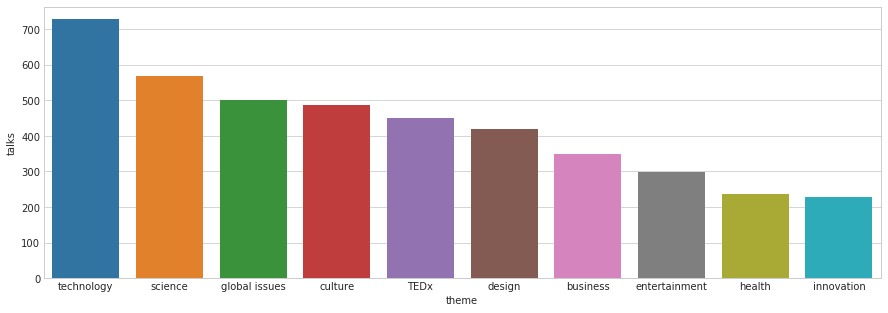

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

As may have been expected, **Technology** is the most popular topic for talks. The other two original factions, Design and Entertainment, also make it to the list of top 10 themes. **Science** and **Global Issues** are the second and the third most popular themes respectively.

The next question I want to answer is the trends in the share of topics of TED Talks across the world. Has the demand for Technology talks increased? Do certain years have a disproportionate share of talks related to global issues? Let's find out! 

We will only be considering the top 7 themes, excluding TEDx and talks after 2009, the year when the number of TED Talks really peaked.

In [50]:
pop_theme_talks = theme_df[(theme_df['theme'].isin(pop_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]
pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


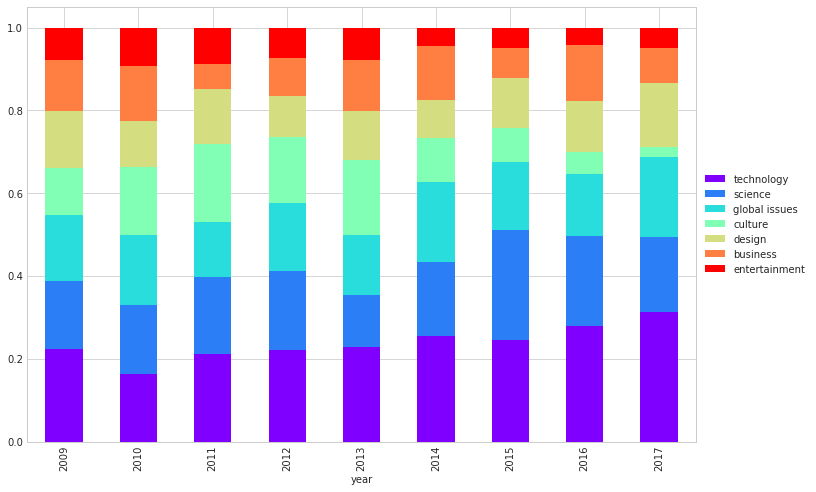

In [51]:
themes = list(pop_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

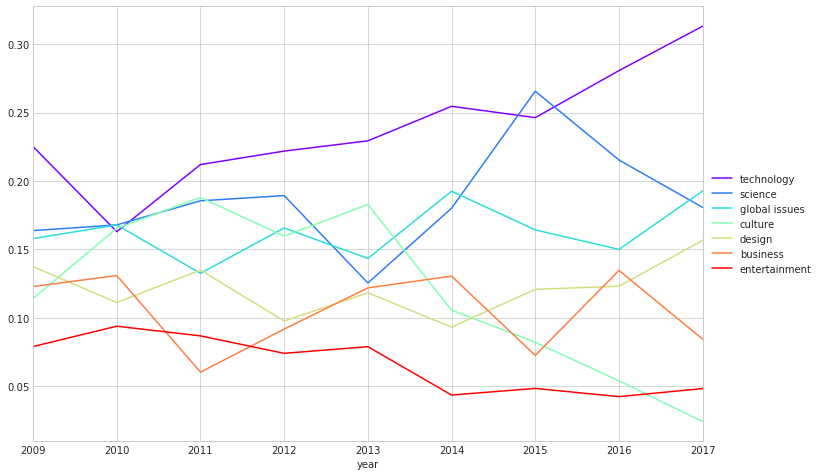

In [52]:
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The proportion of technology talks has steadily increased over the years with a slight dip in 2010. This is understandable considering the boom of technologies such as blockchain, deep learning and augmented reality capturing people's imagination.

Talks on culture have witnessed a dip, decreasing steadily starting 2013. The share of culture talks has been the least in 2017.  Entertainment talks also seem to have witnessed a slight decline in popularity since 2009.

Like with the speaker occupations, let us investigate if certain topics tend to garner more views than certain other topics. We will be doing this analysis for the top ten categories that we discovered in an earlier cell. As with the speaker occupations, the box plot will be used to deduce this relation.

(0, 4000000.0)

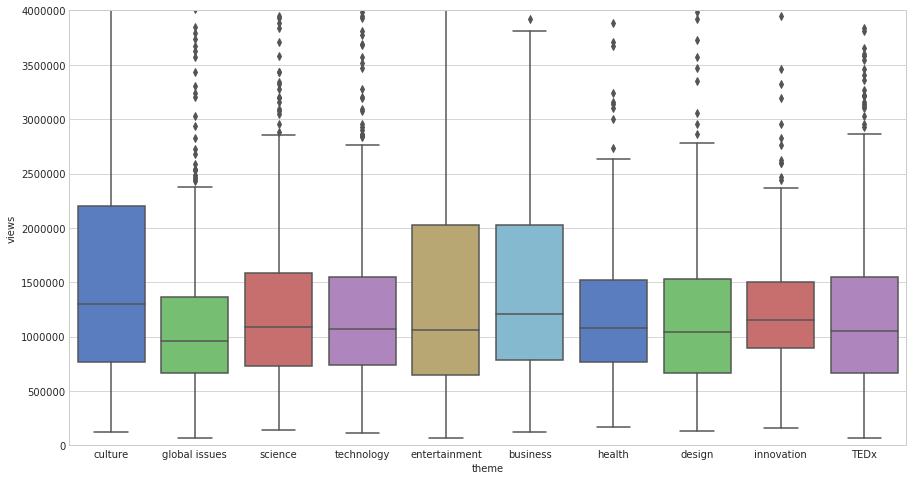

In [53]:
pop_theme_talks = theme_df[theme_df['theme'].isin(pop_themes.head(10)['theme'])]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='theme', y='views', data=pop_theme_talks, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

Although culture has lost its share in the number of TED Talks over the years, they garner the highest median number of views.

## Talk Duration and Word Counts

In this section, we will perform analysis on the length of TED Talks. TED is famous for imposing a very strict time limit of 18 minutes. Although this is the suggested limit, there have been talks as short as 2 minutes and some have stretched to as long as 24 minutes. Let us get an idea of the distribution of TED Talk durations.

In [54]:
#Convert to minutes
df['duration'] = df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

TED Talks, on average are **13.7 minutes long**. I find this statistic surprising because TED Talks are often synonymous with 18 minutes and the average is a good 3 minutes shorter than that.

The shortest TED Talk on record is **2.25 minutes** long whereas the longest talk is **87.6 minutes** long. I'm pretty sure the longest talk was not actually a TED Talk. Let us look at both the shortest and the longest talk.

In [55]:
df[df['duration'] == 2.25]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,month,day,year
239,Murray Gell-Mann: The ancestor of language,The ancestor of language,After speaking at TED2007 on elegance in physi...,Murray Gell-Mann,Physicist,1,2.25,TED2007,03-03-2007,11-06-2008,...,"[culture, global issues, history, language, ph...",61,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/murray_gell_mann_on_...,785293,0.000097,Mar,Sat,2007


In [56]:
df[df['duration'] == 87.6]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,month,day,year
640,"Douglas Adams: Parrots, the universe and every...","Parrots, the universe and everything","Blind river dolphins, reclusive lemurs, a parr...",Douglas Adams,"Author, satirist",1,87.6,University of California,16-05-2001,16-03-2010,...,"[biodiversity, biology, comedy, humor, life, r...",0,"[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/douglas_adams_parrot...,473220,0.000213,May,Wed,2001


The shortest talk was at TED2007 titled **The ancestor of language** by Murray Gell-Mann. The longest talk on TED.com, as we had guessed, is not a TED Talk at all. Rather, it was a talk titled **Parrots, the universe and everything** delivered by Douglas Adams at the University of California in 2001.

Let us now check for any correlation between the popularity and the duration of a TED Talk. To make sure we only include TED Talks, we will consider only those talks which have a duration less than 25 minutes.

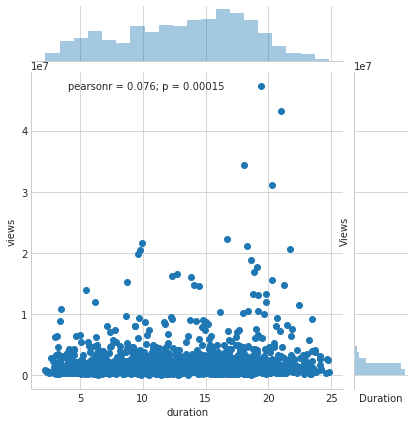

In [57]:
sns.jointplot(x='duration', y='views', data=df[df['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

There seems to be almost no correlation between these two quantities. This strongly suggests that **there is no tangible correlation between the length and the popularity of a TED Talk**. Content is king at TED.

Next, we look at transcripts to get an idea of word count. For this, we introduce our second dataset, the one which contains all transcripts.

In [58]:
df2 = pd.read_csv('../input/transcripts.csv')
df2.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [59]:
len(df2)

2467

It seems that we have data available for 2467 talks. Let us perform a join of the two dataframes on the url feature to include word counts for every talk.

In [60]:
df3 = pd.merge(left=df,right=df2, how='left', left_on='url', right_on='url')
df3.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,languages,ratings,related_talks,url,views,dis_quo,month,day,year,transcript
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.400000,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,Good morning. How are you?(Laughter)It's been ...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.283333,TED2006,25-02-2006,27-06-2006,...,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,Feb,Sat,2006,"Thank you so much, Chris. And it's truly a gre..."
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.433333,TED2006,24-02-2006,27-06-2006,...,26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,Feb,Fri,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18.600000,TED2006,26-02-2006,27-06-2006,...,35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,Feb,Sun,2006,If you're here today — and I'm very happy that...
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19.833333,TED2006,22-02-2006,27-06-2006,...,48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,Feb,Wed,2006,"About 10 years ago, I took on the task to teac..."


In [61]:
df3['transcript'] = df3['transcript'].fillna('')
df3['wc'] = df3['transcript'].apply(lambda x: len(x.split()))

In [62]:
df3['wc'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wc, dtype: float64

We can see that the average TED Talk has around **1971 words** and there is a significantly large standard deviation of a **1009 words**. The longest talk is more than **9044 words** in length.

Like duration, there shouldn't be any correlation between number of words and views. We will proceed to look at a more interesting statstic: **the number of words per minute.**

In [63]:
df3['wpm'] = df3['wc']/df3['duration']
df3['wpm'].describe()

count    2553.000000
mean      142.147752
std        39.635348
min         0.000000
25%       131.069182
50%       149.018182
75%       164.984615
max       247.364865
Name: wpm, dtype: float64

The average TED Speaker enunciates **142 words per minute**. The fastest talker spoke a staggering **247 words a minute** which is much higher than the average of 125-150 words per minute in English. Let us see who this is!


In [64]:
df3[df3['wpm'] > 245]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,related_talks,url,views,dis_quo,month,day,year,transcript,wc,wpm
441,Mae Jemison: Teach arts and sciences together,Teach arts and sciences together,"Mae Jemison is an astronaut, a doctor, an art ...",Mae Jemison,"Astronaut, engineer, entrepreneur, physician a...",1,14.8,TED2002,02-02-2002,05-05-2009,...,"[{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mae_jemison_on_teach...,744257,0.000133,Feb,Sat,2002,What I want to do today is to spend some time ...,3661,247.364865


The person is **Mae Jemison** with a talk on **Teach arts and sciences together** at the TED2002 conference. We should take this result with a pinch of salt because I went ahead and had a look at the talk and she didn't really seem to speak that fast.

Finally, in this section, I'd like to see if there is any correlation between words per minute and popularity. 

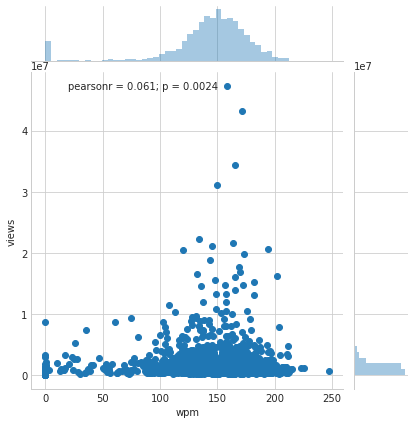

In [65]:
sns.jointplot(x='wpm', y='views', data=df3[df3['duration'] < 25])
plt.show()

Again, there is practically no correlation. If you are going to give a TED Talk, you probably shouldn't worry if you're speaking a little faster or a little slower than usual.

## TED Ratings

TED allows its users to rate a particular talk on a variety of metrics. We therefore have data on how many people found a particular talk funny, inspiring, creative and a myriad of other verbs. Let us inspect how this ratings dictionary actually looks like.

In [66]:
df.iloc[1]['ratings']

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [67]:
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))

In this section, I want to find out which talks were rated the funniest, the most beautiful, the most confusing and most jaw dropping of all time. The rest is left to the reader to explore. We now need to define three extra features to accomplish this task.

In [68]:
df['funny'] = df['ratings'].apply(lambda x: x[0]['count'])
df['jawdrop'] = df['ratings'].apply(lambda x: x[-3]['count'])
df['beautiful'] = df['ratings'].apply(lambda x: x[3]['count'])
df['confusing'] = df['ratings'].apply(lambda x: x[2]['count'])
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,url,views,dis_quo,month,day,year,funny,jawdrop,beautiful,confusing
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.400000,TED2006,25-02-2006,27-06-2006,...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,19645,1174,3253,6073
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.283333,TED2006,25-02-2006,27-06-2006,...,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,Feb,Sat,2006,544,116,58,62
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.433333,TED2006,24-02-2006,27-06-2006,...,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,Feb,Fri,2006,964,230,60,183
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18.600000,TED2006,26-02-2006,27-06-2006,...,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,Feb,Sun,2006,760,230,59,32
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19.833333,TED2006,22-02-2006,27-06-2006,...,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,Feb,Wed,2006,3202,2542,318,942


### Funniest Talks of all time

In [69]:
df[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:10]

,title,main_speaker,views,published_date,funny
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,21444
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,19645
1030,How to live before you die,Steve Jobs,8744428,06-10-2011,17290
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,14447
1129,The happy secret to better work,Shawn Achor,16209727,01-02-2012,11213
1940,The price of shame,Monica Lewinsky,11443190,20-03-2015,8668
2109,What makes a good life? Lessons from the longe...,Robert Waldinger,16601927,23-12-2015,8590
1747,Why good leaders make you feel safe,Simon Sinek,6803938,19-05-2014,8569
553,The thrilling potential of SixthSense technology,Pranav Mistry,16097077,16-11-2009,8416
176,Underwater astonishments,David Gallo,13926113,11-01-2008,8328


### Most Beautiful Talks of all time

In [70]:
df[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False)[:10]

,title,main_speaker,views,published_date,beautiful
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,9437
677,How great leaders inspire action,Simon Sinek,34309432,04-05-2010,8845
381,Your elusive creative genius,Elizabeth Gilbert,13155478,09-02-2009,8130
2161,Inside the mind of a master procrastinator,Tim Urban,14745406,15-03-2016,7445
1129,The happy secret to better work,Shawn Achor,16209727,01-02-2012,7315
1779,Which country does the most good for the world?,Simon Anholt,4548276,02-07-2014,6390
1346,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,6217
500,The puzzle of motivation,Dan Pink,18830983,24-08-2009,4797
614,Teach every child about food,Jamie Oliver,7638978,11-02-2010,4779
553,The thrilling potential of SixthSense technology,Pranav Mistry,16097077,16-11-2009,4702


### Most Jaw Dropping Talks of all time

In [71]:
df[['title', 'main_speaker', 'views', 'published_date', 'jawdrop']].sort_values('jawdrop', ascending=False)[:10]

,title,main_speaker,views,published_date,jawdrop
4,The best stats you've ever seen,Hans Rosling,12005869,27-06-2006,2542
1163,The power of introverts,Susan Cain,17629275,02-03-2012,2467
381,Your elusive creative genius,Elizabeth Gilbert,13155478,09-02-2009,2093
1030,How to live before you die,Steve Jobs,8744428,06-10-2011,1368
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,1174
677,How great leaders inspire action,Simon Sinek,34309432,04-05-2010,1161
29,The surprising science of happiness,Dan Gilbert,14689301,26-09-2006,1047
117,New insights on poverty,Hans Rosling,3243784,25-06-2007,828
500,The puzzle of motivation,Dan Pink,18830983,24-08-2009,825
1170,Why you will fail to have a great career,Larry Smith,5917201,11-03-2012,752


### Most Confusing Talks of all time

In [72]:
df[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False)[:10]

,title,main_speaker,views,published_date,confusing
1346,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,11111
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,10464
1163,The power of introverts,Susan Cain,17629275,02-03-2012,10218
246,The transformative power of classical music,Benjamin Zander,9315483,25-06-2008,8108
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,7942
972,Building a park in the sky,Robert Hammond,704205,30-06-2011,6685
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,6073
919,3 things I learned while my plane crashed,Ric Elias,6636475,22-04-2011,5834
176,Underwater astonishments,David Gallo,13926113,11-01-2008,5201
1776,How to speak so that people want to listen,Julian Treasure,21594632,27-06-2014,5167


## Related Videos

In this last section, we will have a look at how every TED Talk is related to every other TED Talk by constructing a graph with all the talks as nodes and edges defined between two talks if one talk is on the list of recommended watches of the other. Considering the fact that TED Talks are extremely diverse, it would be interesting to see how dense or sparse our graph will be.

![](https://dragonlaw.io/wp-content/uploads/2016/11/networking-dribbble.gif)

In [73]:
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))

In [74]:
s = df.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [75]:
related_df = df.drop('related_talks', axis=1).join(s)
related_df['related'] = related_df['related'].apply(lambda x: x['title'])

In [76]:
d = dict(related_df['title'].drop_duplicates())
d = {v: k for k, v in d.items()}

In [77]:
related_df['title'] = related_df['title'].apply(lambda x: d[x])
related_df['related'] = related_df['related'].apply(lambda x: d[x])

In [78]:
related_df = related_df[['title', 'related']]
related_df.head()

,title,related
0,0,692
0,0,1502
0,0,1991
0,0,715
0,0,1023


In [79]:
edges = list(zip(related_df['title'], related_df['related']))

In [80]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


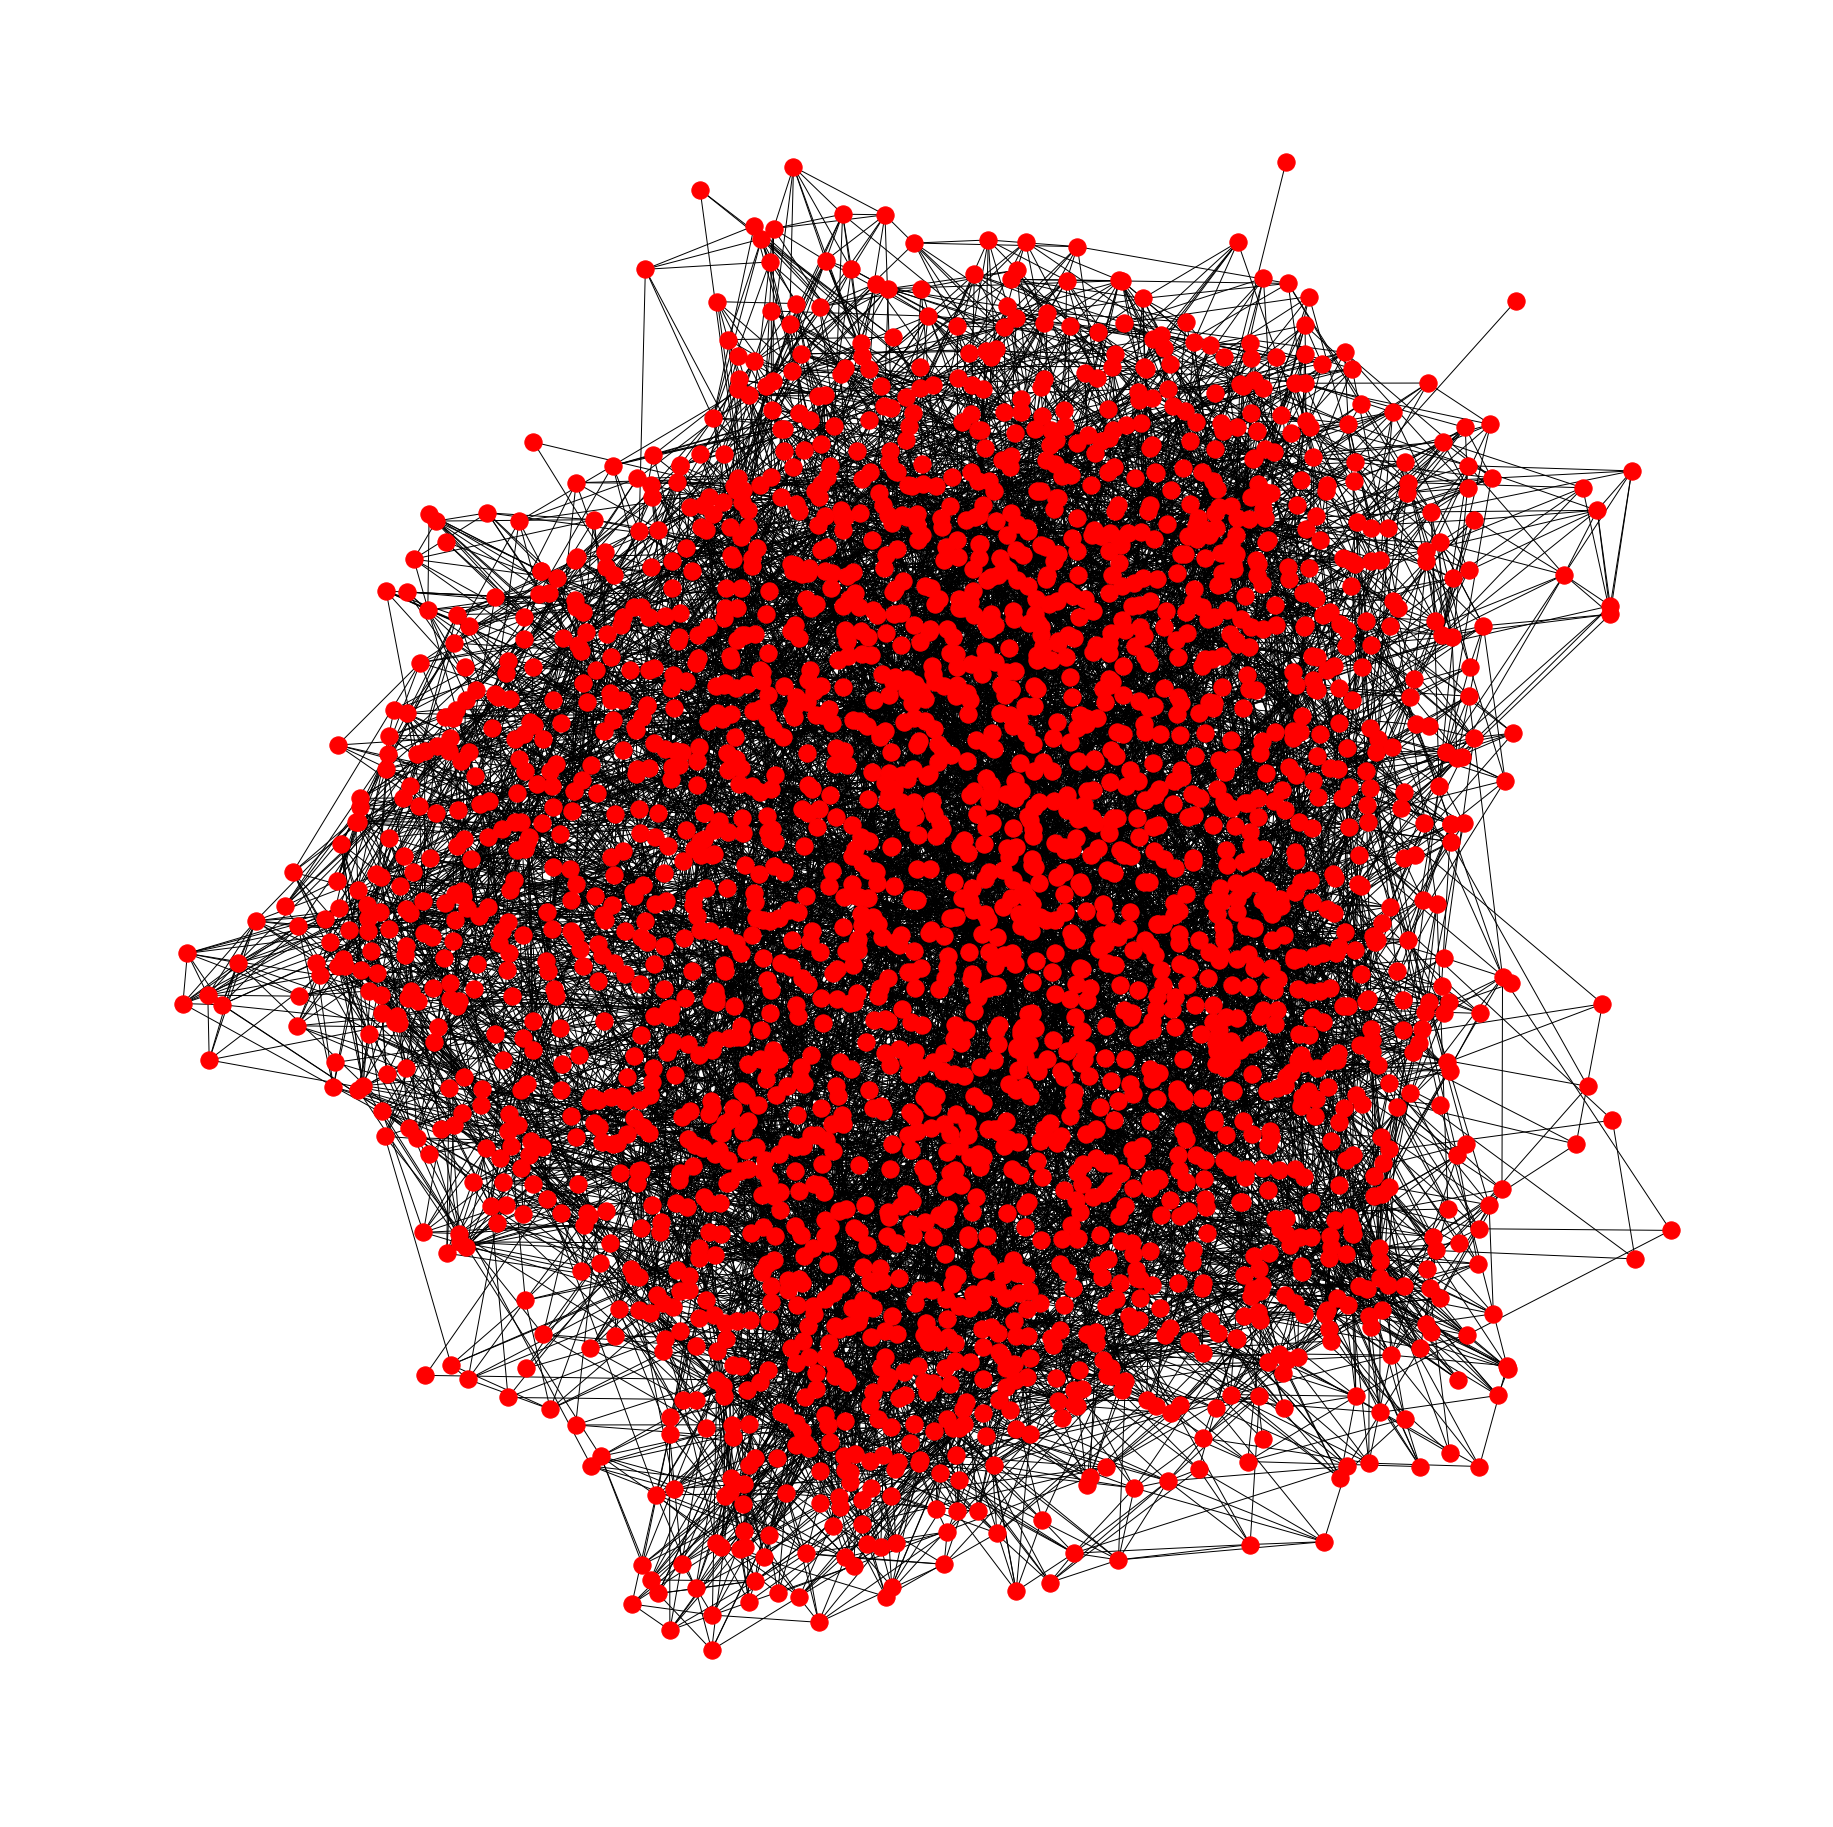

In [81]:
plt.figure(figsize=(25, 25))
nx.draw(G, with_labels=False)

The graph is reasonably dense with every node connected to at least 3 other nodes. This shows us the real beauty of the conference. No matter how different the subjects of the talks are, the common theme of spreading ideas and inspiring people seems to be a adhesive force between them.

## The TED Word Cloud

I was curious about which words are most often used by TED Speakers. Could we create a Word Cloud out of all TED Speeches? Luckily, Python has a very useful word cloud generating library that allows us to do just that. 

In [82]:
corpus = ' '.join(df2['transcript'])
corpus = corpus.replace('.', '. ')

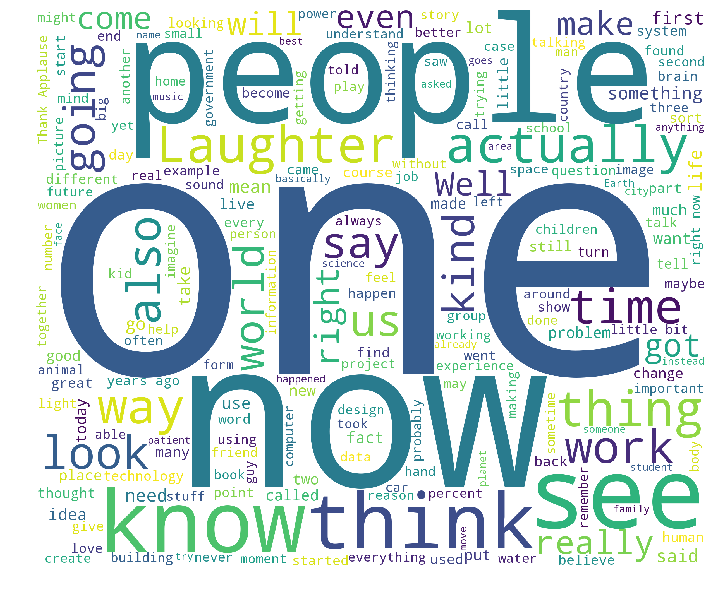

In [83]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The word **One** is the most popular word across the corpus of all TED Transcripts which I think encapsulates the idea of TED pretty well.  **Now**, **Think**, **See**, **People**, **Laughter** and **Know** are among the most popular words used in TED Speeches. TED speeched seem to place a lot of emphasis on knowledge, insight, the present and of course, the people.

I shall end my analysis here. Of course, a lot more can be done using the data we have right now. I will leave this up to the community to come up with more interesting analysis and insights than what I was capable of producing. 